In [58]:
# importing the necessary lib/packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#upload data using pandas data frame
data = pd.read_csv('titanic3.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [60]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [61]:
#the attributes body and boat are dropped.
data = data.drop(['boat','body'],axis=1)

In [62]:
data['embarked'].value_counts()


S    914
C    270
Q    123
Name: embarked, dtype: int64

,Total,Percent
age,263,20.091673
cabin,1014,77.463713
embarked,2,0.152788
fare,1,0.076394
home.dest,564,43.086325


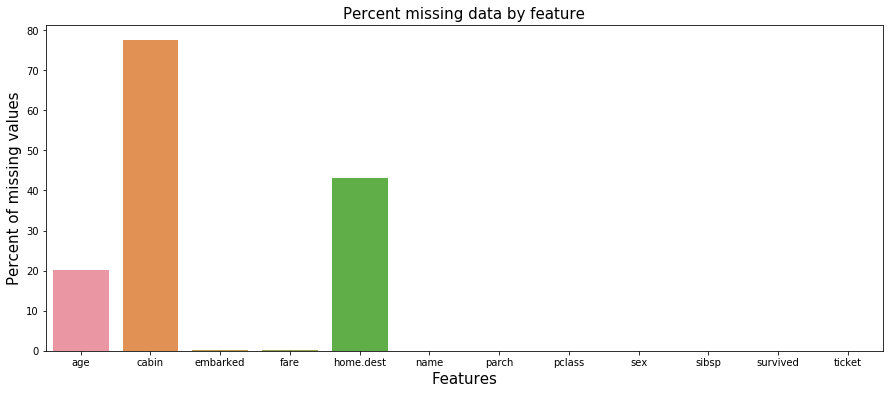

In [63]:
# missing data with aggregation and graph
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count().sort_values(ascending=False))*100
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [64]:
#filled empty fare with median
data.fare.fillna(data.fare.median(),inplace=True)

In [65]:
# filled empty embarked values with most repeated one
data.embarked.fillna(data.embarked.mode()[0],inplace=True)

In [66]:
# I am removing the cabin and home destination as there are more data missing. I think It won't affect the model.
data = data.drop(['cabin','home.dest'],axis=1)

In [67]:
# I am using mean to fill the missing age data.
data.age.fillna(data.age.mean(),inplace=True)

In [68]:
# i am coverting sex column(male,female) to 0 or 1 
data['sex'] = pd.factorize(data.sex)[0]

# i am droping name,ticket,embarked because they all are independent 
data = data.drop(['name','ticket','embarked'],axis=1)

#seperate dataset into x and y
x = data.drop(['survived'],axis=1)
y = data['survived']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null int64
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
dtypes: float64(2), int64(5)
memory usage: 71.7 KB


In [69]:
#split data set into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [71]:
#creating the random forest model
from sklearn.ensemble import RandomForestClassifier
# model4 = RandomForestClassifier()
model4 = RandomForestClassifier()
model4.fit(x_train,y_train)
y4_predict = model4.predict(x_test)

# finding an accuracy and area under roc curve
from sklearn.metrics import accuracy_score,roc_auc_score
print(accuracy_score(y4_predict,y_test))
print(roc_auc_score(y4_predict,y_test))

0.7888040712468194
0.7852988138686132


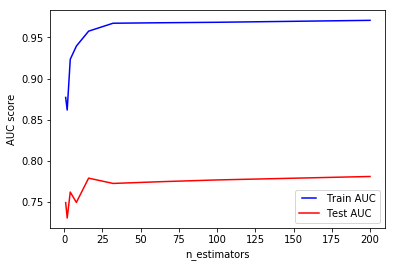

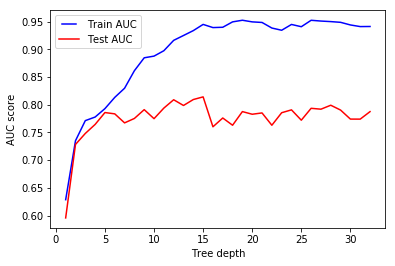

In [42]:
#max_depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

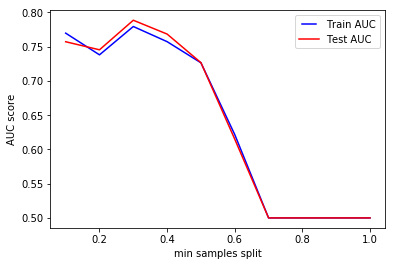

In [73]:
#min_samples_split
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results,'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results,'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

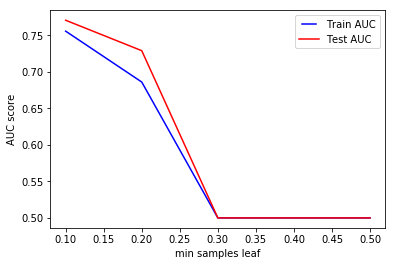

In [25]:
#min_samples_leaf
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results,'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results,'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

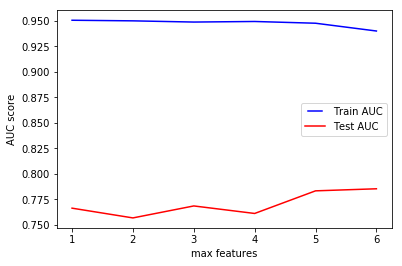

In [74]:
#max_features
max_features = list(range(1,data.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [76]:
#creating the random forest model using the optimized parameters found in the above graphs
optimize_model = RandomForestClassifier(random_state = 1, n_estimators = 1000, min_samples_split = 42,n_jobs = 1,oob_score =True,max_features="auto",min_samples_leaf=5)
optimize_model.fit(x_train,y_train)
y_pred = optimize_model.predict(x_test)

# finding an accuracy and area under roc curve
from sklearn.metrics import accuracy_score,roc_auc_score
print(accuracy_score(y_pred,y_test))
print(roc_auc_score(y_pred,y_test))

0.811704834605598
0.8263413419643968


3Q)Optimize the parameters of the identified classifier from 2.c using AUC as optimization criteria
-->I have Optimized the parameters of Random Forest Model and the accuracy has been increased compared to the non Optimized model.